In [193]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import re 

import scipy.stats as stats  

%matplotlib inline 

sns.set(style = "ticks")

from dateutil.relativedelta import relativedelta

In [194]:
df = pd.read_csv('bankloans data.csv')

In [195]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [196]:
df.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [197]:
present_data = df[df['default'].isnull() == False]

In [198]:
df.shape

(850, 9)

In [199]:
present_data.shape

(700, 9)

In [200]:
test_data = df[df['default'].isnull() == True]

In [201]:
test_data.shape

(150, 9)

In [202]:
present_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [203]:
present_data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [204]:
present_data.duplicated().sum()

0

# Outlier Detection and Treatment Process

In [205]:
present_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

<Axes: >

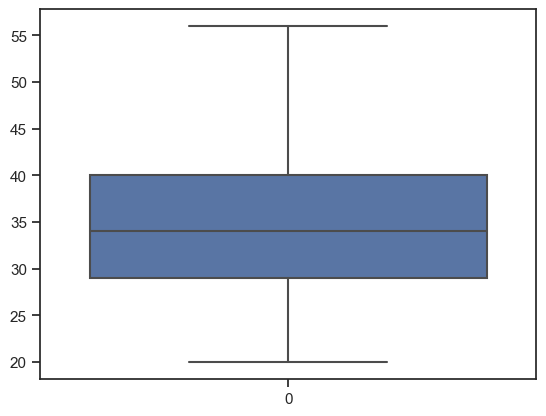

In [206]:
sns.boxplot(present_data.age)

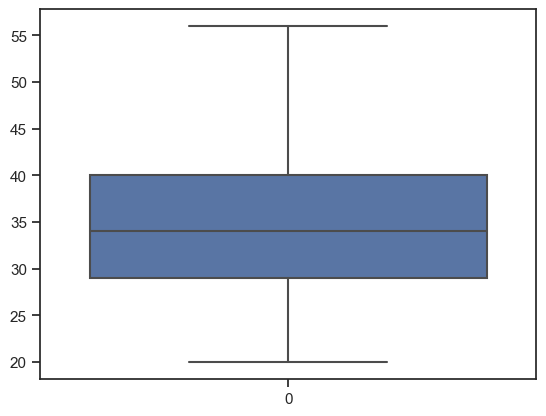

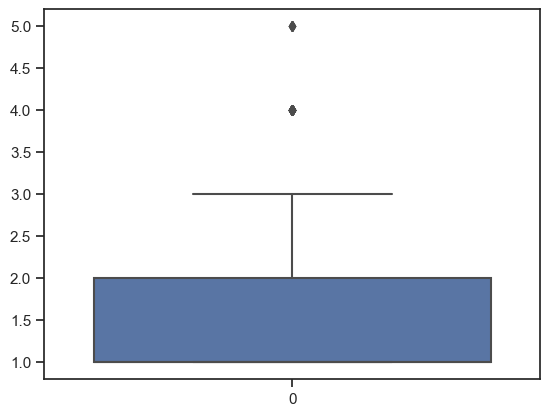

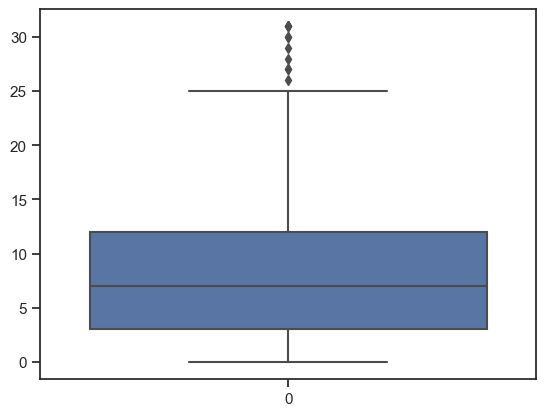

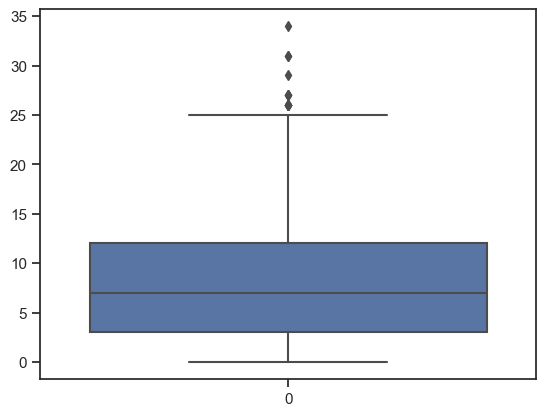

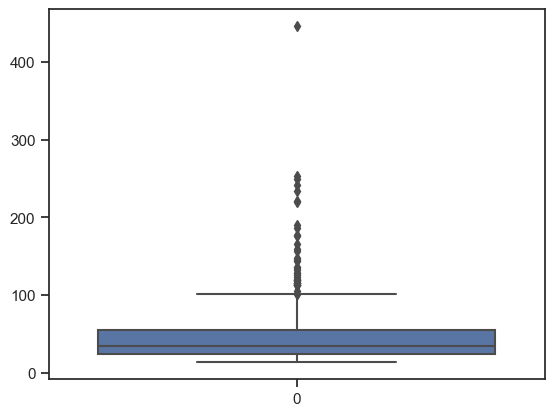

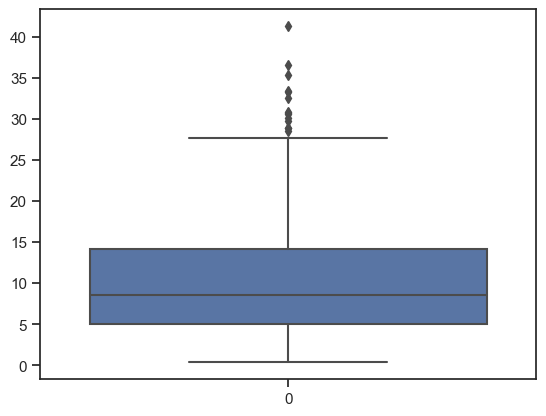

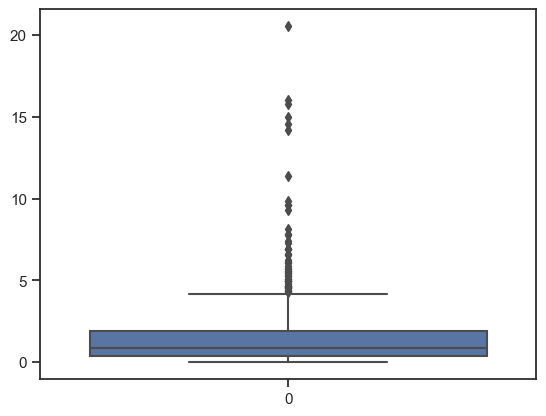

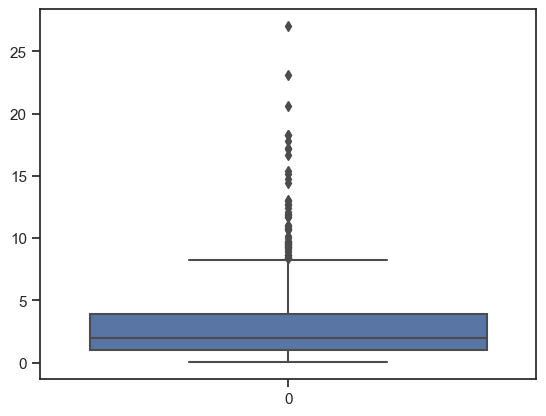

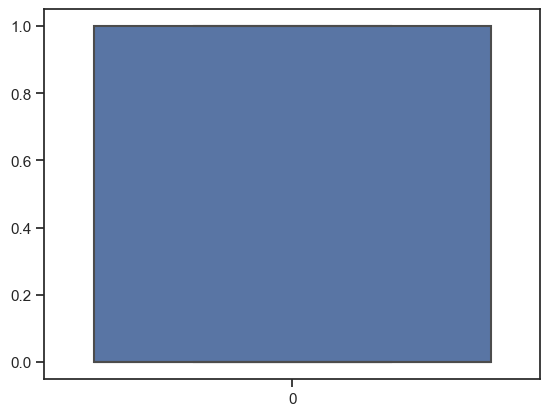

In [207]:
for i in present_data.columns:
    sns.boxplot(present_data[i])
    plt.show()

In [208]:
present_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [209]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [210]:
present_data.apply(outliertreat_IQR)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,12.5,-0.5,-10.5,-10.5,-22.5,-8.6875,-1.930284,-3.274152,-1.5
1,56.5,3.5,25.5,25.5,101.5,27.8125,4.201299,8.241395,2.5


In [211]:
present_data['ed'] = present_data['ed'].clip(lower = -0.5, upper = 3.5)
present_data['employ'] = present_data['employ'].clip(lower = -10.5, upper = 25.5)
present_data['address'] = present_data['address'].clip(lower = -10.5, upper = 25.5)
present_data['debtinc'] = present_data['debtinc'].clip(lower = -8.6875, upper = 27.8125)

C:\Users\Siddhant\AppData\Local\Temp\ipykernel_25816\3610853713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  present_data['ed'] = present_data['ed'].clip(lower = -0.5, upper = 3.5)
C:\Users\Siddhant\AppData\Local\Temp\ipykernel_25816\3610853713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  present_data['employ'] = present_data['employ'].clip(lower = -10.5, upper = 25.5)
C:\Users\Siddhant\AppData\Local\Temp\ipykernel_25816\3610853713.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

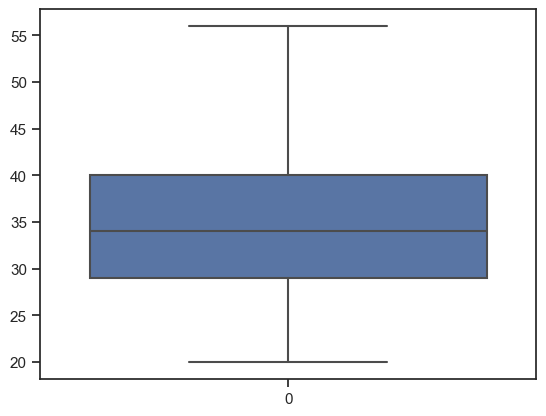

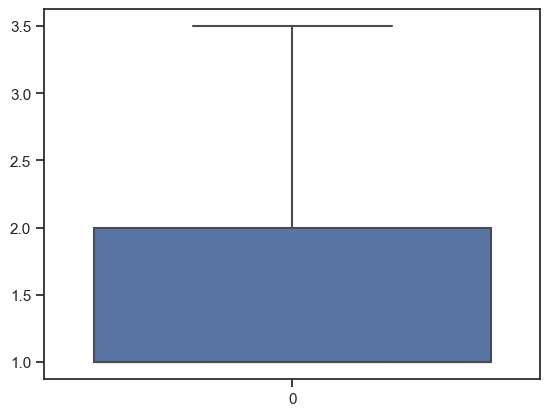

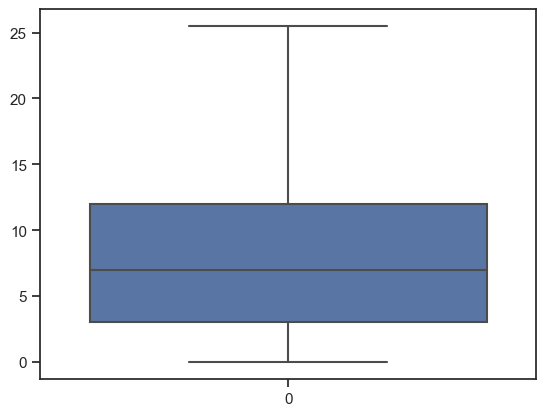

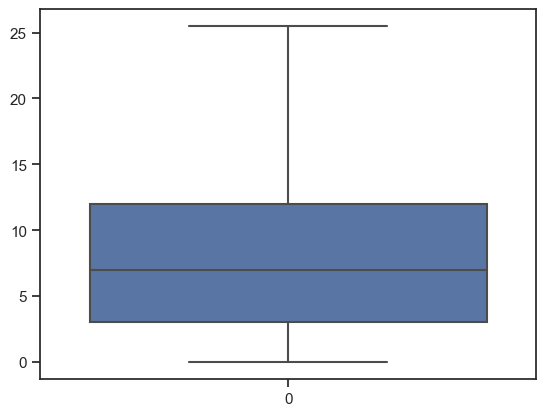

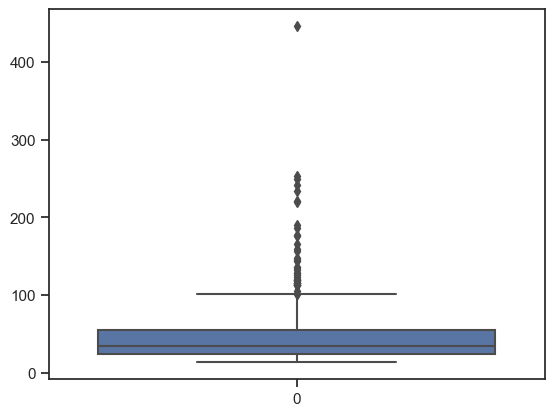

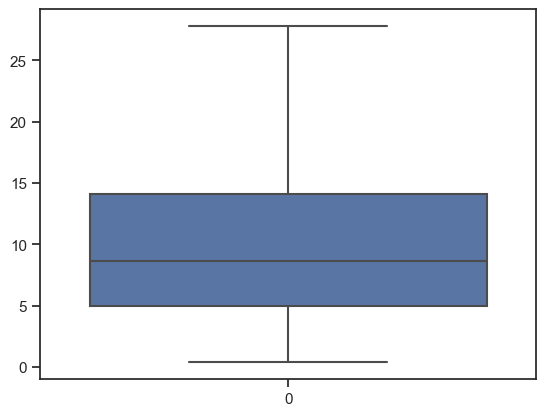

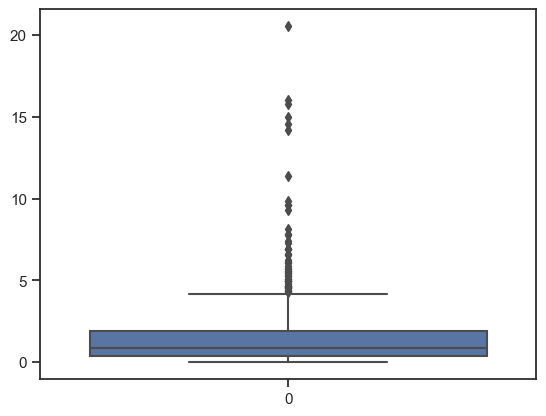

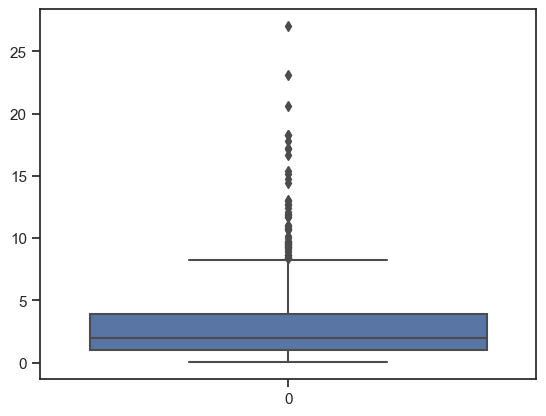

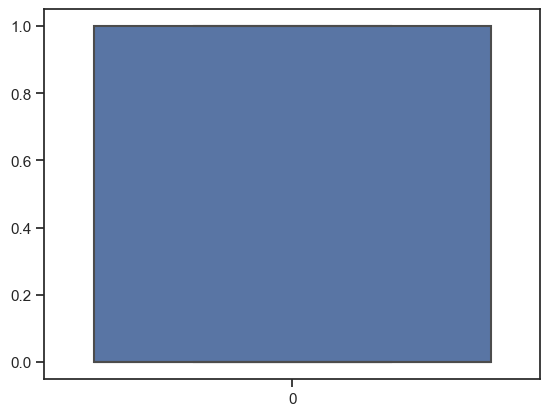

In [212]:
for i in present_data.columns:
    sns.boxplot(present_data[i])
    plt.show()

# Checking the Probability Distribution of the Variables

In [213]:
present_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


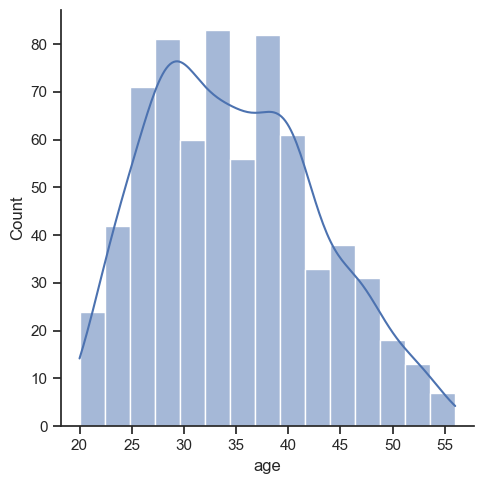

In [214]:
sns.displot(present_data.age, kde = True)

C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **

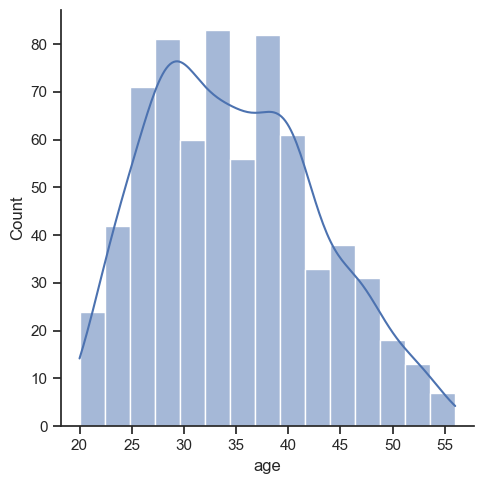

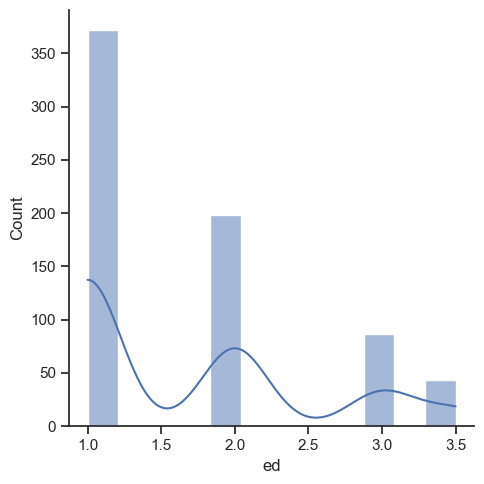

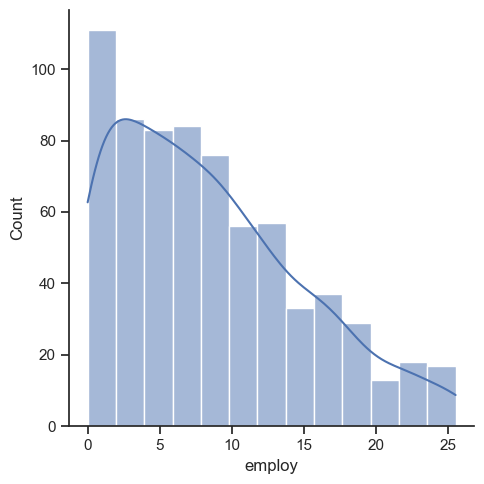

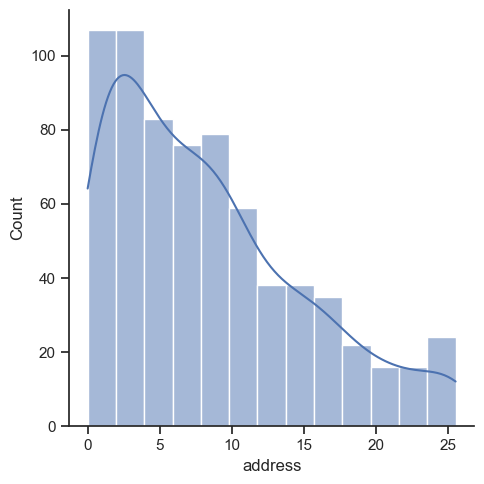

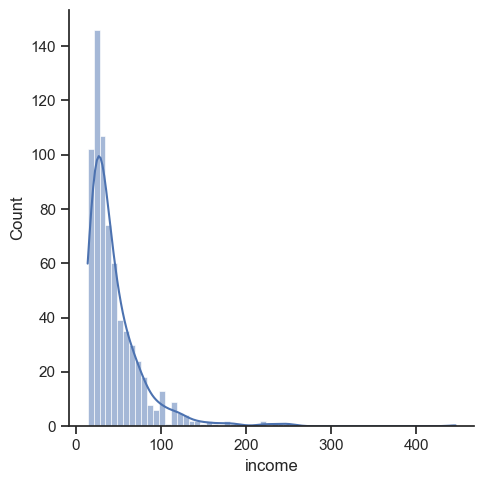

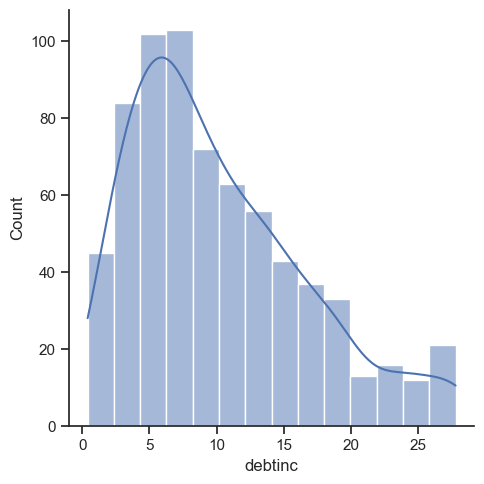

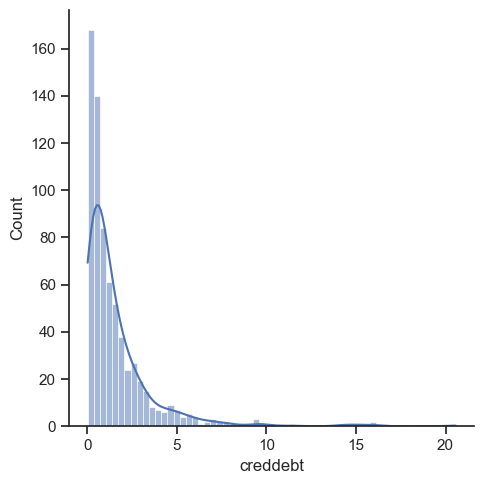

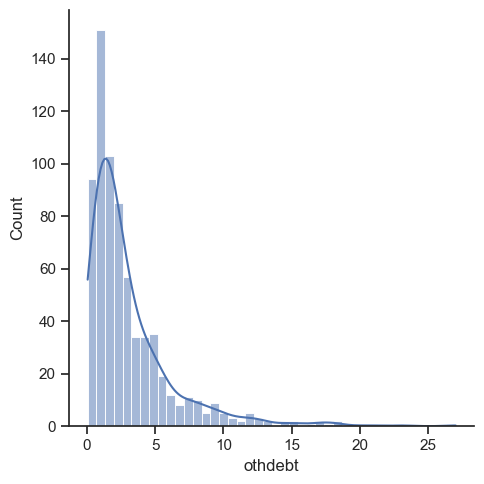

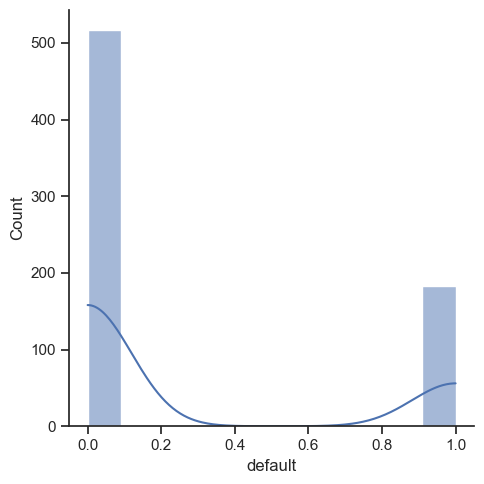

In [215]:
for i in present_data.columns:
    sns.displot(present_data[i], kde = True)


# Lets do Logorithemic Transformations

C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.

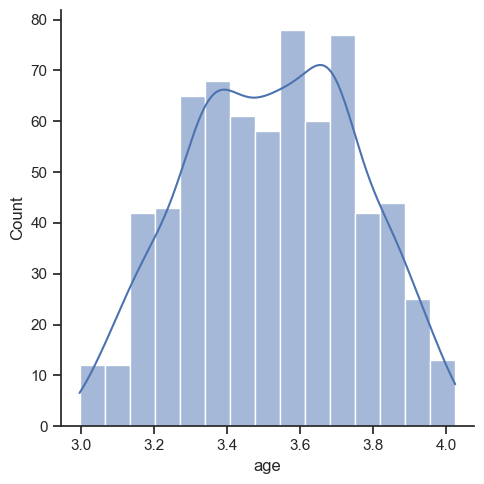

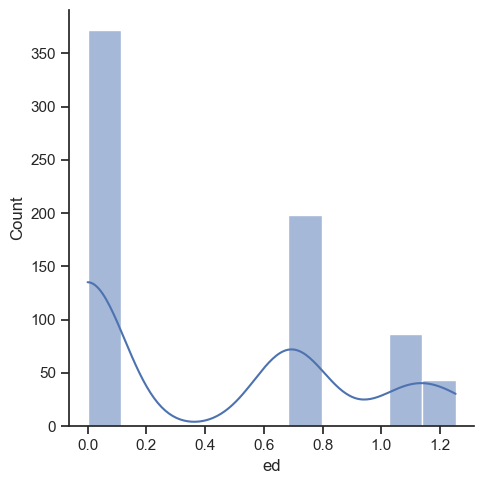

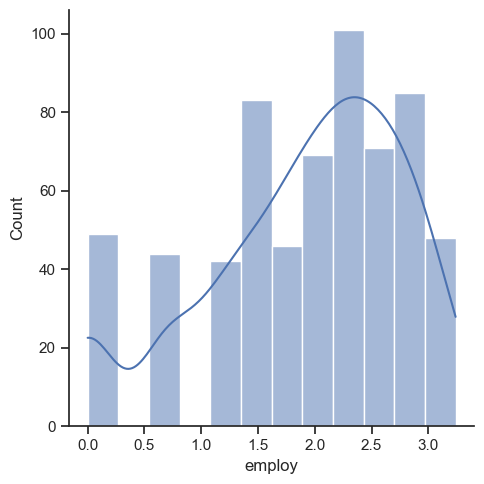

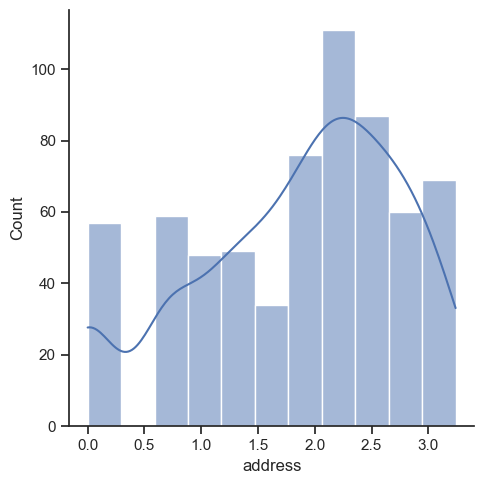

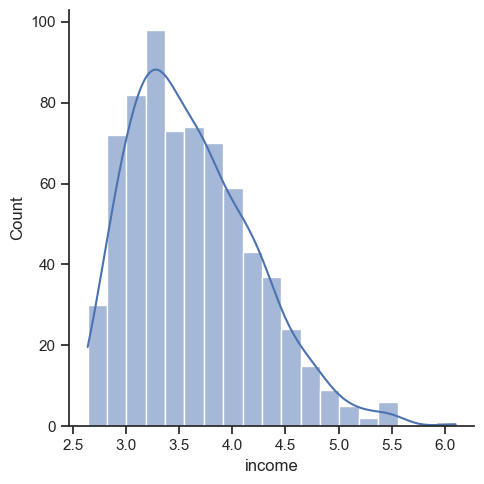

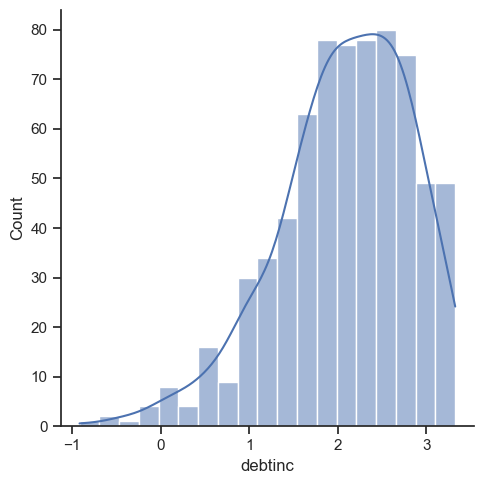

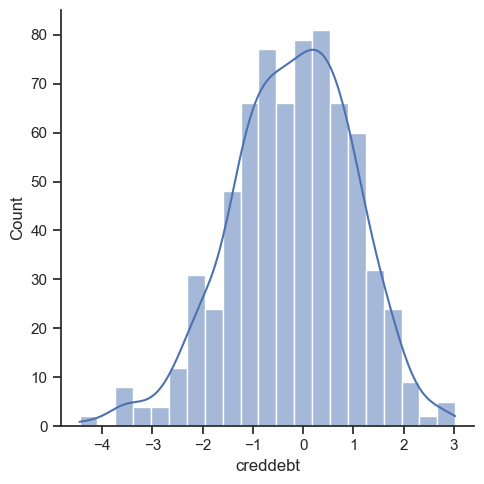

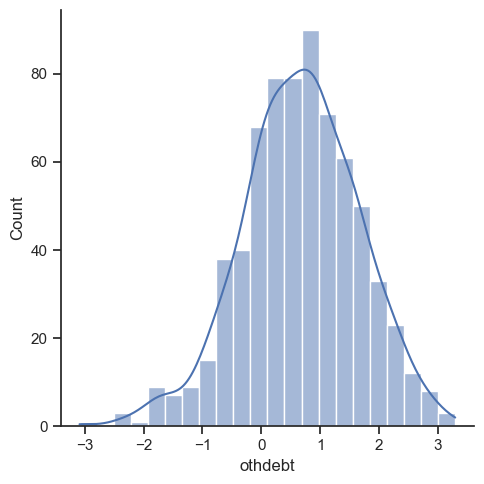

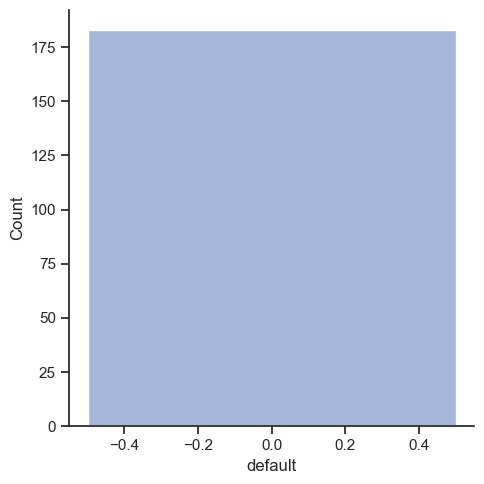

In [216]:
for i in present_data.columns:
    sns.displot(np.log(present_data[i]), kde = True)

In [217]:
## lets do log transformations on all the variables

In [218]:
p_copy = present_data.copy()

In [219]:
p_copy.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3.0,17.0,12.0,176,9.3,11.359392,5.008608,1.0
1,27,1.0,10.0,6.0,31,17.3,1.362202,4.000798,0.0
2,40,1.0,15.0,14.0,55,5.5,0.856075,2.168925,0.0
3,41,1.0,15.0,14.0,120,2.9,2.658720,0.821280,0.0
4,24,2.0,2.0,0.0,28,17.3,1.787436,3.056564,1.0


In [220]:
p_copy['log_age'] = np.log(p_copy['age'])

In [221]:
p_copy.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,log_age
0,41,3.0,17.0,12.0,176,9.3,11.359392,5.008608,1.0,3.713572
1,27,1.0,10.0,6.0,31,17.3,1.362202,4.000798,0.0,3.295837
2,40,1.0,15.0,14.0,55,5.5,0.856075,2.168925,0.0,3.688879
3,41,1.0,15.0,14.0,120,2.9,2.658720,0.821280,0.0,3.713572
4,24,2.0,2.0,0.0,28,17.3,1.787436,3.056564,1.0,3.178054


In [222]:
p_copy['log_ed'] = np.log(p_copy['ed'])

In [223]:
p_copy['log_income'] = np.log(p_copy['income'])

In [224]:
p_copy['log_debtinc'] = np.log(p_copy['debtinc'])

In [225]:
p_copy['log_creddebt'] = np.log(p_copy['creddebt'])

In [226]:
p_copy['log_othdebt'] = np.log(p_copy['othdebt'])

In [227]:
p_copy.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,log_age,log_ed,log_income,log_debtinc,log_creddebt,log_othdebt
0,41,3.0,17.0,12.0,176,9.3,11.359392,5.008608,1.0,3.713572,1.098612,5.170484,2.230014,2.430045,1.611158
1,27,1.0,10.0,6.0,31,17.3,1.362202,4.000798,0.0,3.295837,0.000000,3.433987,2.850707,0.309103,1.386494
2,40,1.0,15.0,14.0,55,5.5,0.856075,2.168925,0.0,3.688879,0.000000,4.007333,1.704748,-0.155397,0.774232
3,41,1.0,15.0,14.0,120,2.9,2.658720,0.821280,0.0,3.713572,0.000000,4.787492,1.064711,0.977845,-0.196891
4,24,2.0,2.0,0.0,28,17.3,1.787436,3.056564,1.0,3.178054,0.693147,3.332205,2.850707,0.580782,1.117291


In [228]:
p_copy = p_copy.drop(columns = ['age', 'ed', 'debtinc', 'creddebt', 'othdebt','income'])

In [229]:
p_copy.head()

,employ,address,default,log_age,log_ed,log_income,log_debtinc,log_creddebt,log_othdebt
0,17.0,12.0,1.0,3.713572,1.098612,5.170484,2.230014,2.430045,1.611158
1,10.0,6.0,0.0,3.295837,0.000000,3.433987,2.850707,0.309103,1.386494
2,15.0,14.0,0.0,3.688879,0.000000,4.007333,1.704748,-0.155397,0.774232
3,15.0,14.0,0.0,3.713572,0.000000,4.787492,1.064711,0.977845,-0.196891
4,2.0,0.0,1.0,3.178054,0.693147,3.332205,2.850707,0.580782,1.117291


In [230]:
#p_copy[p_copy['income']< 1]

In [231]:
#p_copy[p_copy['debtinc']< 1]

In [232]:
#p_copy[p_copy['creddebt']< 1]

In [233]:
#p_copy[p_copy['othdebt']< 1]

In [234]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [235]:
#p_copy.log_othdebt

## Building the Model using Logistic Regression

In [236]:
import statsmodels.formula.api as smf 

In [237]:
from sklearn.model_selection import train_test_split

# performing train_test_split as per stats model 

In [238]:
train,test = train_test_split(p_copy , test_size = 0.3, random_state = 150)

In [239]:
train.head(10)

,employ,address,default,log_age,log_ed,log_income,log_debtinc,log_creddebt,log_othdebt
401,4.0,13.0,0.0,3.637586,0.693147,4.025352,0.470004,-0.817061,-0.789059
684,18.0,10.0,0.0,3.526361,0.000000,3.970292,2.351375,-0.173978,1.552801
482,5.0,3.0,0.0,3.526361,0.000000,3.496508,1.987874,-0.250891,0.489128
167,4.0,9.0,0.0,3.663562,0.000000,3.637586,1.871802,0.163979,0.256044
425,8.0,0.0,0.0,3.583519,1.252763,3.465736,0.470004,-3.705985,-0.718621
213,5.0,3.0,1.0,3.555348,1.098612,3.610918,1.686399,-0.542285,0.348247
141,9.0,6.0,1.0,3.295837,0.000000,3.806662,2.879198,1.047866,1.640634
690,0.0,5.0,0.0,3.178054,0.693147,2.772589,1.987874,-3.707940,0.134069
544,13.0,18.0,0.0,3.637586,1.098612,3.218876,1.740466,-1.068787,0.078418
116,9.0,9.0,0.0,3.526361,0.693147,4.174387,1.824549,0.745593,0.653528


In [240]:
train.shape

(490, 9)

In [241]:
test.shape

(210, 9)

In [242]:
train.columns

Index(['employ', 'address', 'default', 'log_age', 'log_ed', 'log_income',
       'log_debtinc', 'log_creddebt', 'log_othdebt'],
      dtype='object')

In [243]:
formula = 'default~address+log_age+log_ed+employ+log_income+log_debtinc+log_creddebt+log_othdebt' 

In [244]:
m1 = smf.logit(formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.411813
         Iterations 7


In [245]:
print(m1.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            8
Date:                Tue, 10 Sep 2024   Pseudo R-squ.:                  0.2632
Time:                        21:43:18   Log-Likelihood:                -201.79
converged:                       True   LL-Null:                       -273.88
Covariance Type:            nonrobust   LLR p-value:                 3.185e-27
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.0320      6.856     -0.880      0.379     -19.470       7.406
address         -0.0837      0.026     -3.263      0.001      -0.134      -0.033
log_age          0.4403      0.707      0.62

In [246]:
pred= m1.predict(train)

In [247]:
check = pd.concat([train.default, pred], axis = 1)

In [248]:
check.shape

(490, 2)

In [249]:
check.head(10)

,default,0
401,0.0,0.034927
684,0.0,0.032006
482,0.0,0.274557
167,0.0,0.269746
425,0.0,0.007903
213,1.0,0.235131
141,1.0,0.457036
690,0.0,0.074147
544,0.0,0.017329
116,0.0,0.205155


In [250]:
check = check.rename(columns = {0 : 'prediction'})

In [251]:
check.head(10)

,default,prediction
401,0.0,0.034927
684,0.0,0.032006
482,0.0,0.274557
167,0.0,0.269746
425,0.0,0.007903
213,1.0,0.235131
141,1.0,0.457036
690,0.0,0.074147
544,0.0,0.017329
116,0.0,0.205155


In [252]:
# lets take cutoff = 0.3

In [253]:
check['pred_default'] = np.where(check.prediction >= 0.3, 1, 0)

In [254]:
check.head(15)

,default,prediction,pred_default
401,0.0,0.034927,0
684,0.0,0.032006,0
482,0.0,0.274557,0
167,0.0,0.269746,0
425,0.0,0.007903,0
213,1.0,0.235131,0
141,1.0,0.457036,1
690,0.0,0.074147,0
544,0.0,0.017329,0
116,0.0,0.205155,0


In [255]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 401 to 228
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   default       490 non-null    float64
 1   prediction    490 non-null    float64
 2   pred_default  490 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 13.4 KB


In [256]:
check['pred_default'] = check['pred_default'].astype('float')

In [257]:
# build a confusion matrix 

In [258]:
pd.crosstab(index = check.default, columns = check.pred_default, margins = True)

pred_default,0.0,1.0,All
default,,,
0.0,295,74,369
1.0,33,88,121
All,328,162,490


In [259]:
#TP = 89
#TN = 294
#FP = 75
#FN = 32

In [260]:
from sklearn import metrics

In [261]:
print(metrics.classification_report(check.default, check.pred_default))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       369
         1.0       0.54      0.73      0.62       121

    accuracy                           0.78       490
   macro avg       0.72      0.76      0.73       490
weighted avg       0.81      0.78      0.79       490



In [262]:
pred_test = m1.predict(test)

In [263]:
pred_test

539    0.612229
628    0.603033
685    0.468472
71     0.706401
152    0.475769
370    0.108905
480    0.027594
119    0.364536
347    0.126277
224    0.660376
259    0.181389
395    0.174790
398    0.584270
32     0.325917
328    0.139347
436    0.041274
111    0.193562
499    0.870840
198    0.021951
691    0.044384
314    0.612274
637    0.552685
0      0.258655
689    0.228925
477    0.211144
120    0.063432
418    0.667064
172    0.251441
474    0.029096
683    0.159677
677    0.037721
78     0.010935
153    0.118993
278    0.178103
215    0.123056
248    0.109590
43     0.096412
511    0.156771
549    0.525142
548    0.254787
561    0.181604
449    0.755437
624    0.219561
34     0.016959
524    0.250318
367    0.005376
230    0.354888
621    0.100606
62     0.536725
76     0.004210
255    0.084046
292    0.003124
518    0.004200
646    0.044486
475    0.060045
94     0.914693
151    0.033266
241    0.191714
122    0.754690
431    0.092708
185    0.081403
463    0.152582
667    0

In [264]:
check_test = pd.concat([test.default, pred_test], axis = 1)

In [265]:
check_test

,default,0
539,1.0,0.612229
628,0.0,0.603033
685,1.0,0.468472
71,0.0,0.706401
152,0.0,0.475769
370,0.0,0.108905
480,0.0,0.027594
119,1.0,0.364536
347,0.0,0.126277
224,1.0,0.660376


In [266]:
check_test = check_test.rename(columns = {0 : 'test_prediction'})

In [267]:
check_test.head(10)

,default,test_prediction
539,1.0,0.612229
628,0.0,0.603033
685,1.0,0.468472
71,0.0,0.706401
152,0.0,0.475769
370,0.0,0.108905
480,0.0,0.027594
119,1.0,0.364536
347,0.0,0.126277
224,1.0,0.660376


In [268]:
# lets take cutoff = 0.3

In [269]:
check_test['pred_default'] = np.where(check_test.test_prediction >= 0.3, 1, 0)

In [270]:
check_test.head(10)

,default,test_prediction,pred_default
539,1.0,0.612229,1
628,0.0,0.603033,1
685,1.0,0.468472,1
71,0.0,0.706401,1
152,0.0,0.475769,1
370,0.0,0.108905,0
480,0.0,0.027594,0
119,1.0,0.364536,1
347,0.0,0.126277,0
224,1.0,0.660376,1


In [271]:
check_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 539 to 469
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   default          210 non-null    float64
 1   test_prediction  210 non-null    float64
 2   pred_default     210 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 5.7 KB


In [272]:
check_test['pred_default'] = check_test['pred_default'].astype('float')

In [273]:
# build a confusion matrix 

In [274]:
pd.crosstab(index = check_test.default, columns = check_test.pred_default, margins = True)

pred_default,0.0,1.0,All
default,,,
0.0,114,34,148
1.0,21,41,62
All,135,75,210


In [275]:
#TP = 47
#TN = 117
#FP = 31
#FN = 15

In [276]:
print(metrics.classification_report(check_test.default, check_test.pred_default))

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81       148
         1.0       0.55      0.66      0.60        62

    accuracy                           0.74       210
   macro avg       0.70      0.72      0.70       210
weighted avg       0.76      0.74      0.74       210



In [277]:
#even after doing outlier treatment process and converting the variables to normal distribution :
#max training accuracy : 78%
#testing accuracy (before transformations : 78% , after transformations : 74%)

# Splitting the Data into Training and Testing Datasets using SKLearn method

In [278]:
p_copy.head()

,employ,address,default,log_age,log_ed,log_income,log_debtinc,log_creddebt,log_othdebt
0,17.0,12.0,1.0,3.713572,1.098612,5.170484,2.230014,2.430045,1.611158
1,10.0,6.0,0.0,3.295837,0.000000,3.433987,2.850707,0.309103,1.386494
2,15.0,14.0,0.0,3.688879,0.000000,4.007333,1.704748,-0.155397,0.774232
3,15.0,14.0,0.0,3.713572,0.000000,4.787492,1.064711,0.977845,-0.196891
4,2.0,0.0,1.0,3.178054,0.693147,3.332205,2.850707,0.580782,1.117291


In [279]:
p_copy.shape

(700, 9)

In [280]:
y = p_copy.default

In [281]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
5      0.0
6      0.0
7      0.0
8      1.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     1.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     1.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     1.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     1.0
45     0.0
46     0.0
47     0.0
48     1.0
49     0.0
50     1.0
51     0.0
52     1.0
53     0.0
54     0.0
55     1.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     1.0
62     0.0
63     0.0
64     0.0
65     1.0
66     1.0
67     0.0
68     1.0
69     1.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     1.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     1.0
87     0.0
88     0.0
89     1.0
90     0.0

In [282]:
x = p_copy.columns.difference(['default'])

In [283]:
x

Index(['address', 'employ', 'log_age', 'log_creddebt', 'log_debtinc', 'log_ed',
       'log_income', 'log_othdebt'],
      dtype='object')

In [284]:
X = p_copy[x]

In [285]:
X

,address,employ,log_age,log_creddebt,log_debtinc,log_ed,log_income,log_othdebt
0,12.0,17.0,3.713572,2.430045,2.230014,1.098612,5.170484,1.611158
1,6.0,10.0,3.295837,0.309103,2.850707,0.000000,3.433987,1.386494
2,14.0,15.0,3.688879,-0.155397,1.704748,0.000000,4.007333,0.774232
3,14.0,15.0,3.713572,0.977845,1.064711,0.000000,4.787492,-0.196891
4,0.0,2.0,3.178054,0.580782,2.850707,0.693147,3.332205,1.117291
5,5.0,5.0,3.713572,-0.934709,2.322388,0.693147,3.218876,0.768857
6,9.0,20.0,3.663562,1.343876,3.325486,0.000000,4.204693,2.813498
7,11.0,12.0,3.761200,-2.051111,1.280934,0.000000,3.637586,0.214634
8,4.0,3.0,3.178054,0.306269,3.194583,0.000000,2.944439,1.187127
9,13.0,0.0,3.583519,1.021623,2.980619,0.000000,3.218876,0.764211


# DECISION TREE ALGORITHM

In [286]:
from sklearn.tree import DecisionTreeClassifier

In [287]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=123)

In [288]:
train_X.shape

(490, 8)

In [289]:
train_y.shape

(490,)

In [290]:
test_X.shape

(210, 8)

In [291]:
test_y.shape

(210,)

In [292]:
train_X.columns

Index(['address', 'employ', 'log_age', 'log_creddebt', 'log_debtinc', 'log_ed',
       'log_income', 'log_othdebt'],
      dtype='object')

# Building a Decision Tree Model

In [293]:
dct = DecisionTreeClassifier(max_depth= 6, max_features=9, max_leaf_nodes=20).fit(train_X, train_y)

In [294]:
train_y

404    0.0
63     0.0
34     0.0
33     0.0
583    1.0
457    0.0
523    0.0
118    1.0
15     1.0
42     0.0
431    0.0
295    0.0
171    0.0
174    0.0
229    0.0
534    0.0
594    1.0
508    0.0
93     1.0
279    0.0
55     1.0
699    0.0
697    0.0
272    0.0
153    0.0
116    0.0
482    0.0
267    1.0
327    0.0
691    0.0
623    0.0
578    0.0
585    0.0
18     0.0
469    1.0
311    0.0
30     0.0
653    1.0
0      1.0
72     0.0
331    1.0
183    0.0
550    1.0
254    0.0
266    0.0
212    0.0
345    1.0
501    1.0
300    1.0
470    1.0
273    0.0
402    0.0
24     1.0
421    0.0
199    1.0
205    0.0
289    0.0
399    1.0
645    1.0
362    0.0
675    0.0
264    0.0
430    1.0
519    0.0
388    0.0
545    0.0
606    1.0
148    0.0
448    1.0
627    0.0
105    0.0
387    0.0
114    0.0
234    0.0
298    1.0
313    0.0
49     0.0
243    0.0
435    0.0
179    1.0
201    1.0
157    1.0
231    1.0
498    1.0
546    0.0
326    0.0
618    1.0
561    0.0
352    0.0
297    0.0
450    0.0

In [295]:
pred_class = dct.predict(train_X)

In [296]:
pred_class

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [297]:
print('train_auc:', metrics.roc_auc_score(train_y, pred_class))

train_auc: 0.8362747587607923


In [298]:
#You don't have to change the hyper-parameters manually by hit and trial method everytime, otherwise it will take a lot of time.
#To get the best hyper-parameters, we can use the Grid Search Cross validation.

In [299]:
param_grid = {'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'max_features':[3,4,5,6,7,8,9], 'max_leaf_nodes': [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]}

In [300]:
from sklearn.model_selection import GridSearchCV

In [301]:
dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5,scoring='roc_auc').fit(train_X, train_y)

In [302]:
dt_model.best_params_

{'max_depth': 3, 'max_features': 4, 'max_leaf_nodes': 16}

In [303]:
dt_model.best_score_

0.7856699670960234

In [304]:
dct_1 = DecisionTreeClassifier(max_depth= 6, max_features=4, max_leaf_nodes=6).fit(train_X, train_y)

In [305]:
pred_class = dct_1.predict(train_X)

In [306]:
pred_class

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [307]:
print('train_auc:', metrics.roc_auc_score(train_y, pred_class))

train_auc: 0.603457761977315


In [308]:
pred_test_class = dct_1.predict(test_X)

In [309]:
print('train_auc:', metrics.roc_auc_score(test_y, pred_test_class))

train_auc: 0.5077691453940066
